In [57]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [58]:
class KNN_Clasifier(object):

    def __init__(self, k = 3):
        self.k = k
   
    def distanciaEuclideana(self,obj1, obj2):
        sum = 0
        for i in range(0,len(obj1)):
            sum += (obj1[i] - obj2[i])**2
        res = math.sqrt(sum)
        return res

    def create_euclidean_distance_list(self, characteristics: list, center: list) -> list:
        distancias = []
        for element in characteristics:
            distancias.append(self.distanciaEuclideana(center, element))
        return distancias

    def most_frequent(self,List):
        counter = 0
        num = List[0]
        
        for i in List:
            curr_frequency = List.count(i)
            if(curr_frequency> counter):
                counter = curr_frequency
                num = i
    
        return num

    def simple_predict(self, X_std: list, y: list, new_object: list):
        distances = self.create_euclidean_distance_list(characteristics=X_std, center=new_object[0])
        distances_origin = distances.copy()
        distances.sort()

        winners = []
        for i in np.arange(self.k):
            winners.append(y[distances_origin.index(distances[i])])

        return self.most_frequent(winners)
    
    def predict(self, X_train: list, y_train: list, X_test: list):
        y_pred = []
        for element in X_test:
            y_pred.append(self.simple_predict(X_std=X_train, y=y_train, new_object=[element]))
        return y_pred


In [59]:
data = np.array([
    [1, 1.78, 0.93, 1.10, 5.95],
    [1, -0.05, -0.44, 1.05, 3.83],
    [1, -0.12, 0.97, 1.56, 4.89],
    [2, -1.59, -1.65, -0.35, 1.48],
    [2, -1.04, 1.05, -1.22, 3.87],
    [2, 0.79, -1.07, -0.54, 3.82],
    [3, -0.53, -0.20, -0.66, 3.14],
    [3, 0.24, 0.88, 0.025, 4.53],
    [3, 0.52, -0.47, -0.96, 3.82]])

In [60]:
X = data[:,1:4]  
y = data[:,0]

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


new_object = [-2.79, -2.37, -0.80]
new_object = scaler.transform([new_object])
print(new_object)

[[-2.95407676 -2.51304221 -0.84877677]]


In [61]:
knn = KNN_Clasifier(k=3)
result = knn.simple_predict(X_std=X, y=y, new_object=new_object)
print(f'La clase predicha es: {result}')

La clase predicha es: 2.0


In [62]:
from sklearn.datasets import load_wine
X = load_wine().data
y = load_wine().target

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

y_pred = knn.predict(X_train=X_train, y_train=y_train, X_test=X_test)

<Axes: >

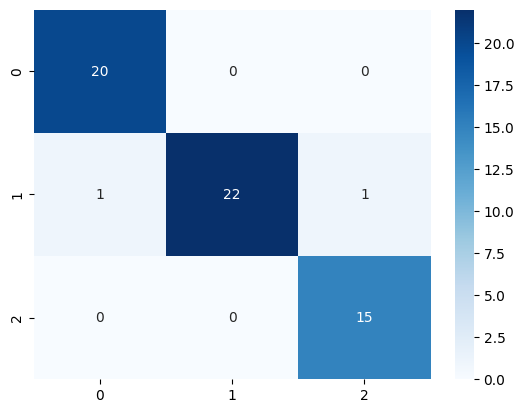

In [63]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap="Blues")

In [64]:
target_names = load_wine().target_names
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class_0       0.95      1.00      0.98        20
     class_1       1.00      0.92      0.96        24
     class_2       0.94      1.00      0.97        15

    accuracy                           0.97        59
   macro avg       0.96      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59

